# 실습 과제

* 데이터셋 설명이 되어 있는 홈페이지입니다. https://www.kaggle.com/datasets/camnugent/california-housing-prices
* 유명한 데이터셋 중 하나이기에 구글링 하면 관련 자료, 코드, 설명 등을 확인할 수 있습니다. 이번 과제는 이 데이터셋을 활용해 전처리를 진행해보는 것입니다.
* 수업에서 배운 내용을 바탕으로 전처리를 진행해보세요. 아래에 비어져 있는 칸을 자유롭게 채우시면 됩니다.

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [2]:
# 데이터 로드
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target

In [3]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
# 데이터 탐색

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [9]:
corr = df.corr()
corr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [11]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

<function matplotlib.pyplot.show(close=None, block=None)>

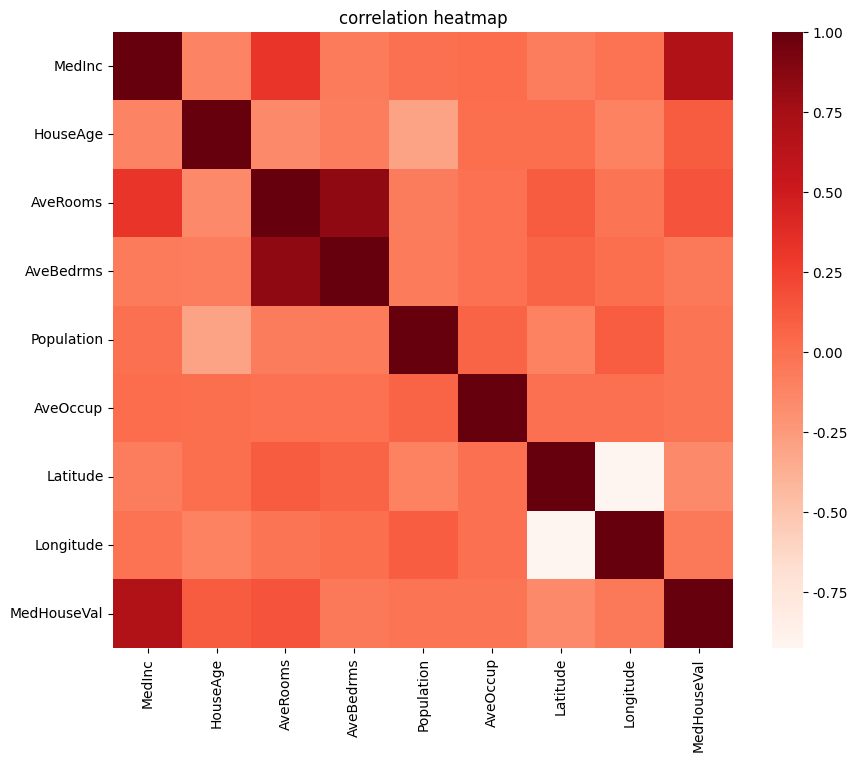

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="Reds")
plt.title("correlation heatmap")
plt.show

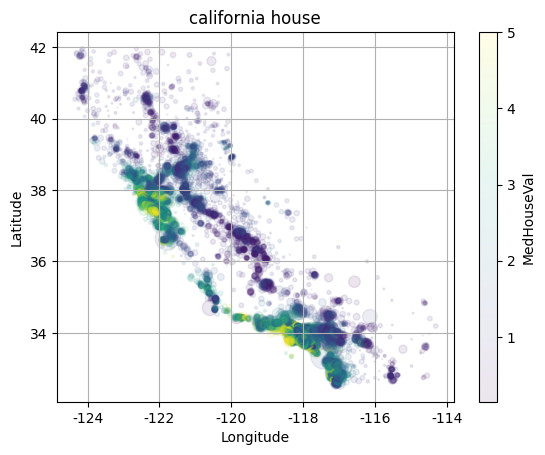

In [40]:
df.plot(kind="scatter", x='Longitude', y='Latitude', s=df["Population"]/100, c='MedHouseVal', colorbar=True, grid=True, alpha=0.1)
plt.title("california house")
plt.show()

In [ ]:
# 결측치 확인 및 처리

In [7]:
df.isnull()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False


In [27]:
df.duplicated().sum()

0

In [26]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [ ]:
# 이상치 탐지 (시각화, or scaler 사용)

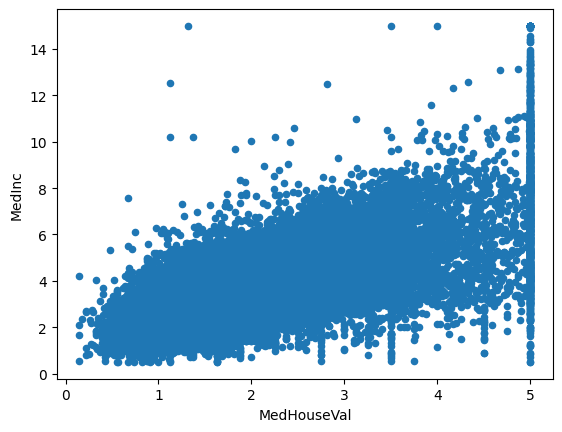

In [42]:
df.plot(kind='scatter', x='MedHouseVal', y='MedInc')
plt.show()

In [43]:
len(df)

20640

In [45]:
df[df['MedHouseVal'] == 5]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
4719,3.5556,25.0,4.022013,1.039308,1183.0,1.860063,34.06,-118.38,5.0
4823,2.3536,26.0,2.826563,1.000000,2543.0,3.973438,34.05,-118.31,5.0
5301,2.2444,20.0,2.977011,1.117595,2667.0,2.358090,34.06,-118.45,5.0
5308,4.7109,32.0,4.508393,1.043165,798.0,1.913669,34.05,-118.44,5.0
6776,6.0199,49.0,5.752412,0.926045,848.0,2.726688,34.12,-118.15,5.0
8290,3.6250,29.0,4.213518,1.087558,1059.0,1.626728,33.72,-118.16,5.0
8299,5.8408,52.0,5.411765,1.002451,791.0,1.938725,33.77,-118.14,5.0
8933,3.6121,29.0,4.006961,1.111369,741.0,1.719258,34.00,-118.48,5.0
9810,6.7770,23.0,8.103960,1.143564,1480.0,2.442244,36.58,-121.94,5.0
9850,1.2656,19.0,3.791908,1.156069,248.0,1.433526,36.60,-121.89,5.0


In [48]:
df.drop(df[df['MedHouseVal'] == 5].index, axis=0, inplace=True)
len(df)

20613

In [ ]:
# 데이터 정규화

해안가의 주택 가격이 내륙에 위치한 주택의 가격보다 대체적으로 높은 것을 알 수 있다.


대체적으로 평균임금이 높을수록 높은 가치의 주택을 보유하는 경우가 많다.


In [ ]:
평균임금과 평균주택가치를 시각화 하였을 때 평균주택가치가 5일 때 수직선의 분포를 가지므로 해당 데이터를 삭제함.

### Tip: scaler 사용 방법
간단한 사용법은 아래와 같습니다. 필수사항은 아니기에 관심있으시면 공부해보시는 것을 추천드립니다.

In [ ]:
# 이를 위해 pip install scikit-learn 을 해야 할 수 있습니다.

# Z score Scaler 사용법
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data) # data에 scaling 하고 싶은 data(칼럼 형태로) 삽입

# Min-Max Scaler 사용법
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data) # data에 scaling 하고 싶은 data(칼럼 형태로) 삽입